In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
US_data = pd.read_csv("accident_data.csv")
US_data

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,10-08-2024,12:45:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,30,Wednesday,August,2024
143,15-09-2024,08:30:00,37.7749,-122.4194,Highway,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,35,Thursday,September,2024
144,20-10-2024,16:20:00,34.0522,-118.2437,Street,Clear,Dry,Clear,Collision,Minor,Other,Car,2,45,Wednesday,October,2024
145,25-11-2024,14:10:00,40.7128,-74.0060,Intersection,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,55,Thursday,November,2024


In [3]:
US_data.describe()

,Latitude,Longitude,No of Vehichles,Vehicle Speed,Year
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,38.325525,-98.649265,1.428571,38.843537,2022.979592
std,3.197276,20.962406,0.496564,8.110285,0.823203
min,34.052200,-122.419400,1.000000,25.000000,2022.000000
25%,34.052200,-118.243700,1.000000,30.000000,2022.000000
50%,40.712800,-87.629800,1.000000,35.000000,2023.000000
75%,40.712800,-74.006000,2.000000,45.000000,2024.000000
max,41.878100,-74.006000,2.000000,55.000000,2024.000000


In [4]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  147 non-null    object 
 1   Time                  147 non-null    object 
 2   Latitude              147 non-null    float64
 3   Longitude             147 non-null    float64
 4   Location Description  147 non-null    object 
 5   Weather Conditions    147 non-null    object 
 6   Road Conditions       147 non-null    object 
 7   Visibility            147 non-null    object 
 8   Accident Type         147 non-null    object 
 9   Injury Severity       147 non-null    object 
 10  Contributing Factors  147 non-null    object 
 11  Vehicle Type          147 non-null    object 
 12  No of Vehichles       147 non-null    int64  
 13  Vehicle Speed         147 non-null    int64  
 14  Day of Week           147 non-null    object 
 15  Month                 1

In [5]:
US_data.isnull().sum()

Date                    0
Time                    0
Latitude                0
Longitude               0
Location Description    0
Weather Conditions      0
Road Conditions         0
Visibility              0
Accident Type           0
Injury Severity         0
Contributing Factors    0
Vehicle Type            0
No of Vehichles         0
Vehicle Speed           0
Day of Week             0
Month                   0
Year                    0
dtype: int64

In [6]:
US_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
142     True
143     True
144     True
145     True
146     True
Length: 147, dtype: bool

In [7]:
print(US_data.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')


In [8]:
# Convert 'Date' and 'Time' columns to datetime format
US_data['DateTime'] = pd.to_datetime(US_data['Date'] + ' ' + US_data['Time'], format="%d-%m-%Y %H:%M:%S")

# Set 'DateTime' as the index
US_data.set_index('DateTime', inplace=True)

In [9]:
print(US_data.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')


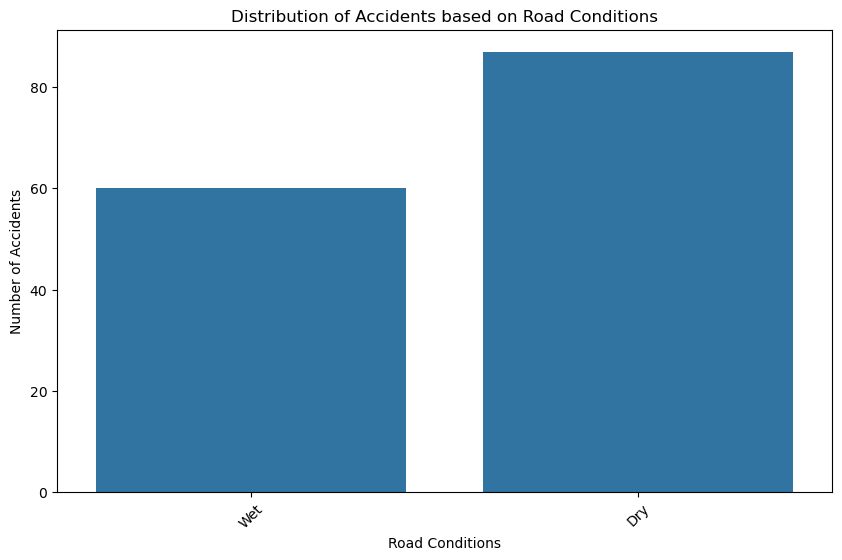

In [10]:
# Distribution of accidents based on road conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road Conditions', data= US_data)
plt.title('Distribution of Accidents based on Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

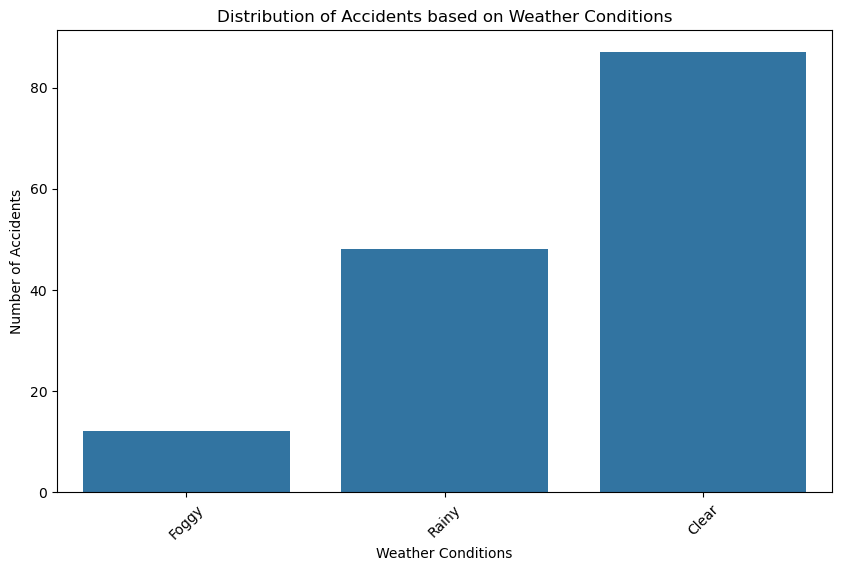

In [11]:
# Distribution of accidents based on weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather Conditions', data= US_data)
plt.title('Distribution of Accidents based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()  

In [12]:
US_data.index

DatetimeIndex(['2022-01-05 15:30:00', '2022-02-10 18:45:00',
               '2022-03-15 12:00:00', '2022-04-20 09:20:00',
               '2022-05-25 17:10:00', '2022-06-30 14:30:00',
               '2022-07-05 20:15:00', '2022-08-10 12:45:00',
               '2022-09-15 08:30:00', '2022-10-20 16:20:00',
               ...
               '2024-03-15 12:00:00', '2024-04-20 09:20:00',
               '2024-05-25 17:10:00', '2024-06-30 14:30:00',
               '2024-07-05 20:15:00', '2024-08-10 12:45:00',
               '2024-09-15 08:30:00', '2024-10-20 16:20:00',
               '2024-11-25 14:10:00', '2024-12-30 10:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=147, freq=None)

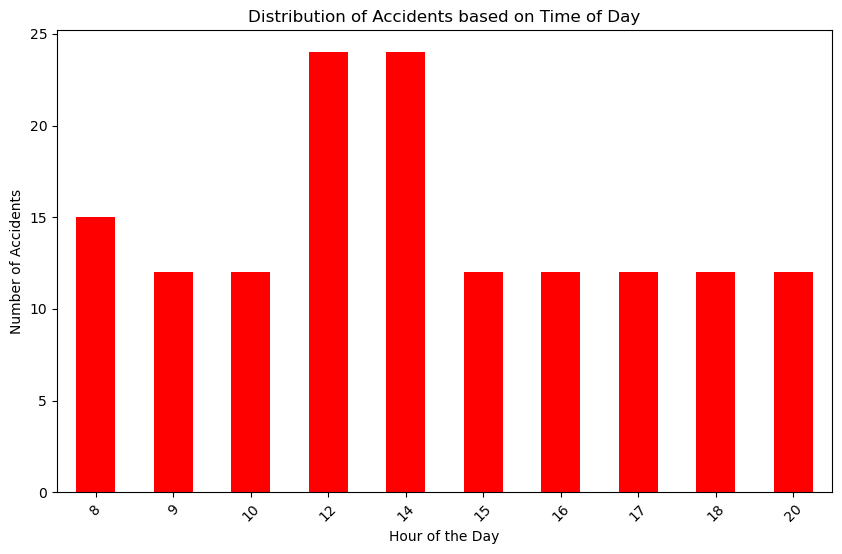

In [13]:
plt.figure(figsize=(10, 6))
US_data.index.hour.value_counts().sort_index().plot(kind='bar',color='red')
plt.title('Distribution of Accidents based on Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

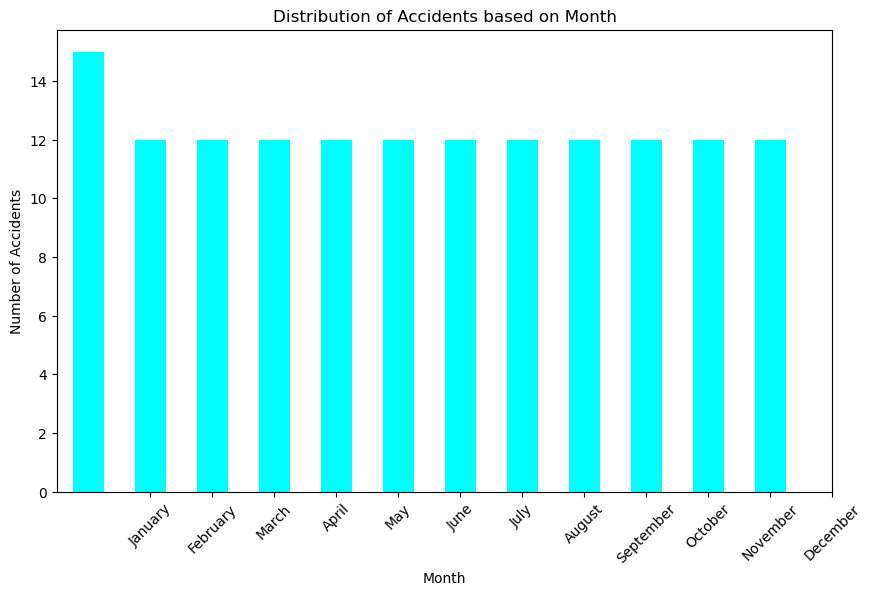

In [14]:
# Distribution of accidents based on month
plt.figure(figsize=(10, 6))
US_data.index.month.value_counts().sort_index().plot(kind='bar',color="cyan")
plt.title('Distribution of Accidents based on Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

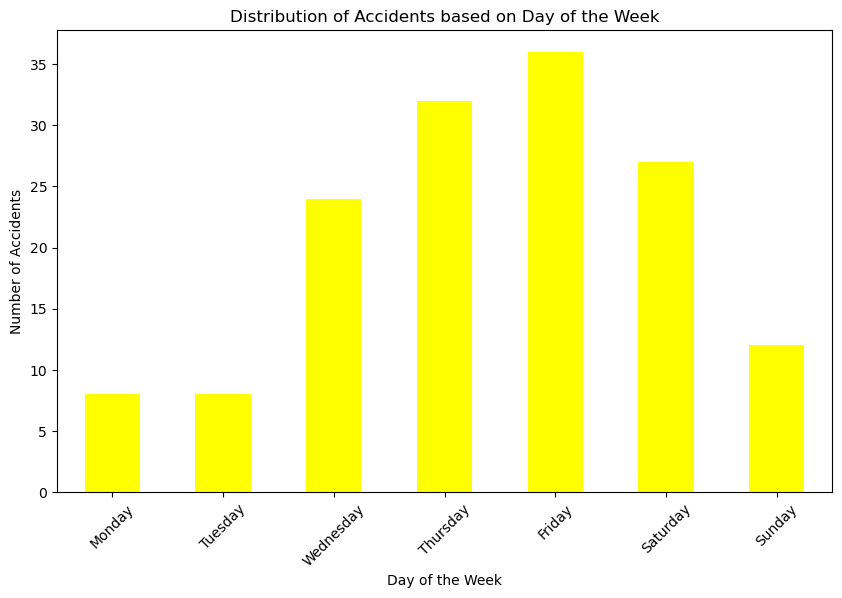

In [16]:
plt.figure(figsize=(10, 6))
US_data.index.dayofweek.value_counts().sort_index().plot(kind='bar',color = "yellow")
plt.title('Distribution of Accidents based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

In [20]:
import folium

# Create a map centered around the mean latitude and longitude
map_accidents = folium.Map(location=[US_data['Latitude'].mean(), US_data['Longitude'].mean()], zoom_start=10)

# Add small circles for each accident location
for index, row in US_data.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=0.6,
                        popup=f"Latitude: {row['Latitude']}, Longitude: {row['Longitude']}").add_to(map_accidents)

# Display the map
map_accidents
# remember to zoom out.